In [8]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 

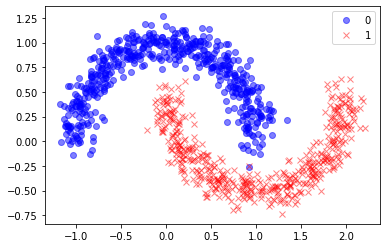

In [5]:
from sklearn.datasets import make_moons
%matplotlib inline
import matplotlib.pyplot as plt

X, y_target = make_moons(n_samples=1000, noise=0.1, random_state=0)

plt.plot(X[y_target==0, 0], X[y_target==0, 1], 'ob', alpha=0.5)
plt.plot(X[y_target==1, 0], X[y_target==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_target,
                                                    test_size=0.3,
                                                    random_state=42)

In [32]:
model = keras.Sequential([
    layers.Dense(1, input_dim=2, activation='sigmoid', name = "layer_1"),
    layers.Dense(4, activation='relu', name = "layer_2")
], name="model_1")

In [ ]:
model = keras.Sequential(name = "test")
model.add()

In [31]:
x = tf.ones((1, 4))
#y = model(x)

In [38]:
print(*model.weights)
print(len(model.weights))


<tf.Variable 'layer_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-0.8250768],
       [-0.146554 ]], dtype=float32)> <tf.Variable 'layer_1/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)> <tf.Variable 'layer_2/kernel:0' shape=(1, 4) dtype=float32, numpy=
array([[-0.49346673, -0.7271267 ,  0.75112057,  0.85943747]],
      dtype=float32)> <tf.Variable 'layer_2/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>
4


In [34]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 1)                 3         
_________________________________________________________________
layer_2 (Dense)              (None, 4)                 8         
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [43]:
model = keras.Sequential(name = "conv2d")
model.add(keras.Input(shape=(250, 250, 3)))  # 250x250 RGB images

model.add(layers.Conv2D(kernel_size = 5 ,filters = 32, strides=2, activation="relu"))
model.summary()
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(3))

# Can you guess what the current output shape is at this point? Probably not.
# Let's just print it:
model.summary()

# The answer was: (40, 40, 32), so we can keep downsampling...

model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(3))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(2))

# And now?
model.summary()

# Now that we have 4x4 feature maps, time to apply global max pooling.
model.add(layers.GlobalMaxPooling2D())

# Finally, we add a classification layer.
model.add(layers.Dense(10))


Model: "conv2d"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 123, 123, 32)      2432      
Total params: 2,432
Trainable params: 2,432
Non-trainable params: 0
_________________________________________________________________
Model: "conv2d"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 123, 123, 32)      2432      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 121, 121, 32)      9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 40, 40, 32)        0         
Total params: 11,680
Trainable params: 11,680
Non-trainable params: 0
_________________________________________________________________
Model: "conv2d"
______________________

In [65]:
initial_model = keras.Sequential(
    [
        keras.Input(shape=(250, 250, 3)),
        layers.Conv2D(32, 5, strides=2, activation="relu"),
        layers.Conv2D(32, 3, activation="relu"),
        layers.Conv2D(32, 3, activation="relu"),
    ]
)
feature_extractor = keras.Model(
    inputs=initial_model.inputs,
    outputs=[layer.output for layer in initial_model.layers],
)
print(initial_model.inputs)
print(*[layer.output for layer in initial_model.layers])
# Call feature extractor on test input.
x = tf.ones((1, 250, 250, 3))
#print(x[0:10])
features = feature_extractor(x[:])
features

[<tf.Tensor 'input_25:0' shape=(None, 250, 250, 3) dtype=float32>]
Tensor("conv2d_87/Relu:0", shape=(None, 123, 123, 32), dtype=float32) Tensor("conv2d_88/Relu:0", shape=(None, 121, 121, 32), dtype=float32) Tensor("conv2d_89/Relu:0", shape=(None, 119, 119, 32), dtype=float32)


[<tf.Tensor: shape=(1, 123, 123, 32), dtype=float32, numpy=
 array([[[[0.04351549, 0.23640758, 0.20495409, ..., 0.6568784 ,
           0.00531086, 0.        ],
          [0.04351549, 0.23640758, 0.20495409, ..., 0.6568784 ,
           0.00531086, 0.        ],
          [0.04351549, 0.23640758, 0.20495409, ..., 0.6568784 ,
           0.00531086, 0.        ],
          ...,
          [0.04351549, 0.23640758, 0.20495409, ..., 0.6568784 ,
           0.00531086, 0.        ],
          [0.04351549, 0.23640758, 0.20495409, ..., 0.6568784 ,
           0.00531086, 0.        ],
          [0.04351549, 0.23640758, 0.20495409, ..., 0.6568784 ,
           0.00531086, 0.        ]],
 
         [[0.04351549, 0.23640758, 0.20495409, ..., 0.6568784 ,
           0.00531086, 0.        ],
          [0.04351549, 0.23640758, 0.20495409, ..., 0.6568784 ,
           0.00531086, 0.        ],
          [0.04351549, 0.23640758, 0.20495409, ..., 0.6568784 ,
           0.00531086, 0.        ],
          ...,
       